In [1]:
import os
import sys

import json
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['figure.constrained_layout.use'] = True

In [2]:
IMAGE_PATH = 'images'

In [3]:
colors = {
        '0': 'olive',
        '1': 'green',
        '2': 'darkorchid',
        '3': 'deeppink',
        '4': 'dodgerblue',
        '5': 'dodgerblue',
        'VDN': 'darkorange',
        r'${\delta}I$': 'olive',
        r'${\delta}I-b-1$': 'green',
        'RL4IM': 'darkorchid',
        'RL4IM w/o state abstraction': 'dodgerblue',
        '#Graph=10': 'cyan',
        '#Graph=50': 'green',
        '#Graph=100': 'turquoise',
        '#Graph=200': 'dodgerblue',
        '#Graph=500': 'blue',
}

In [4]:
def sliding_mean(data_array, window=5):
    """Sliding average"""
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)

    return new_list

In [5]:
from collections import defaultdict

fig3_plot_data, fig4_plot_data = defaultdict(list), defaultdict(list)

# get_files = lambda path: [os.path.join(path, f) for f in os.listdir(path) if (f != '.DS_Store' and not f.endswith('_bak'))]


get_files = lambda path, my_list: [os.path.join(path, f) for f in my_list]

fig3_files = get_files('fig3', ['579', '582', '586', '587'])
fig4_files = get_files('fig4', ['605', '608', '611', '612', '619'])

files = [fig3_files, fig4_files]

for i, data_obj in enumerate([fig3_plot_data, fig4_plot_data]):
    for ff in files[i]:
        with open(os.path.join(ff, 'eval_episode_rewards.json')) as f:
            print(f'[INFO] reading {os.path.join(ff, "eval_episode_rewards.json")}')
            
            data = json.load(f)
            # data_obj['steps'] = data['100000/eval_episode_reward_T']
            data_obj['100000'].append([sliding_mean(d) for d in data['100000']])
            data_obj['100001'].append([sliding_mean(d) for d in data['100001']])
            data_obj['100002'].append([sliding_mean(d) for d in data['100002']])
            data_obj['100003'].append([sliding_mean(d) for d in data['100003']])
            data_obj['100004'].append([sliding_mean(d) for d in data['100004']])

[INFO] reading fig3/579/eval_episode_rewards.json
[INFO] reading fig3/582/eval_episode_rewards.json
[INFO] reading fig3/586/eval_episode_rewards.json
[INFO] reading fig3/587/eval_episode_rewards.json
[INFO] reading fig4/605/eval_episode_rewards.json
[INFO] reading fig4/608/eval_episode_rewards.json
[INFO] reading fig4/611/eval_episode_rewards.json
[INFO] reading fig4/612/eval_episode_rewards.json
[INFO] reading fig4/619/eval_episode_rewards.json


In [6]:
def plot_algo(ax, algo_name, algo_label, algo_mean, algo_std, lw, alpha=0.3, x_ticks=None):
    ax.plot(x_ticks if x_ticks is not None else range(len(algo_mean)), algo_mean, label=algo_label, lw=lw, color=colors[algo_name])
    ax.fill_between(x_ticks if x_ticks is not None else range(len(algo_mean)), 
                    algo_mean+algo_std, 
                    algo_mean-algo_std,
                    facecolor=colors[algo_name], 
                    alpha=alpha)

In [7]:
def convert_labels(labels):
    for i, label in enumerate(labels):
        if label == '500K':
            labels[i] = '0.5M'
        if label == '1000K':
            labels[i] = '1M'
    return labels

In [8]:
def plot_figures(data, plot_legend=True, fig_name='3'):
    fig = plt.figure()
    lw = 3
    # fig.subplots_adjust(hspace=0.4, wspace=0.4)
    col = 5
    nrows = 1
    alpha_shade = 0.18
    
    fontsize = 28
    
    graphs = ['100000', '100001', '100002', '100003', '100004']
    
    tasks = {
        '3': [r'${\delta}I$', r'${\delta}I-b-1$', 'RL4IM', 'RL4IM w/o state abstraction'],
        '4': ['#Graph=10', '#Graph=50', '#Graph=100', '#Graph=200', '#Graph=500']
    }
    
    fig, axes = plt.subplots(nrows=nrows, ncols=col, figsize=(35,5))
    for j in range(col):
        ax = axes[j]
        
        d_step = data['steps']
        d_data = np.array(data[graphs[j]])

        plot_algo(ax, algo_name=tasks[fig_name][0], algo_label=tasks[fig_name][0], algo_mean=np.mean(d_data[0], axis=1), algo_std=np.std(d_data[0], axis=1), lw=lw, alpha=0.3)
        plot_algo(ax, algo_name=tasks[fig_name][1], algo_label=tasks[fig_name][1], algo_mean=np.mean(d_data[1], axis=1), algo_std=np.std(d_data[1], axis=1), lw=lw, alpha=0.3)
        plot_algo(ax, algo_name=tasks[fig_name][2], algo_label=tasks[fig_name][2], algo_mean=np.mean(d_data[2], axis=1), algo_std=np.std(d_data[2], axis=1), lw=lw, alpha=0.3)
        plot_algo(ax, algo_name=tasks[fig_name][3], algo_label=tasks[fig_name][3], algo_mean=np.mean(d_data[3], axis=1), algo_std=np.std(d_data[3], axis=1), lw=lw, alpha=0.3)
        
        if fig_name == '4':
            plot_algo(ax, algo_name=tasks[fig_name][4], algo_label=tasks[fig_name][4], algo_mean=np.mean(d_data[4], axis=1), algo_std=np.std(d_data[4], axis=1), lw=lw, alpha=0.3)

        # ax.set_ylim([0, 1.05])
        if i == 1:
            ax.set_xlabel('Train Steps', fontsize=fontsize)
        if j == 0:
            ax.set_ylabel('Expected Influence', fontsize=fontsize)

        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.grid(color='grey', ls = ':', lw=0.5)

        # ax.spines['right'].set_color((.5,.5,.5))
        # ax.spines['top'].set_color((.9,.9,.9))

        def set_xy_axis():
            xticks = [0, 20, 40, 60, 80, 100]
            xlabels = ['0', '400', '800', '1.2K', '1.6K', '2K']
            ax.set_xticks(xticks)
            ax.set_xticklabels(xlabels)

            # ax.set_yticks([0, 25, 50, 75, 100])

            ax.xaxis.set_tick_params(labelsize=fontsize)
            ax.yaxis.set_tick_params(labelsize=fontsize)

        set_xy_axis()
        ax.set_title(f'Validation Graph #{j+1}', fontsize=fontsize)

        if plot_legend and j == 0:
            legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18), fontsize=fontsize, ncol=14, frameon=False)
            # legend = ax.legend(fontsize=6, frameon=False)
            for line in legend.get_lines():
                line.set_linewidth(12)
    
    #fig.tight_layout()
    os.makedirs(f'{IMAGE_PATH}/UAI2021', exist_ok=True)
    plt.savefig(f'{IMAGE_PATH}/UAI2021/fig{fig_name}.pdf', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

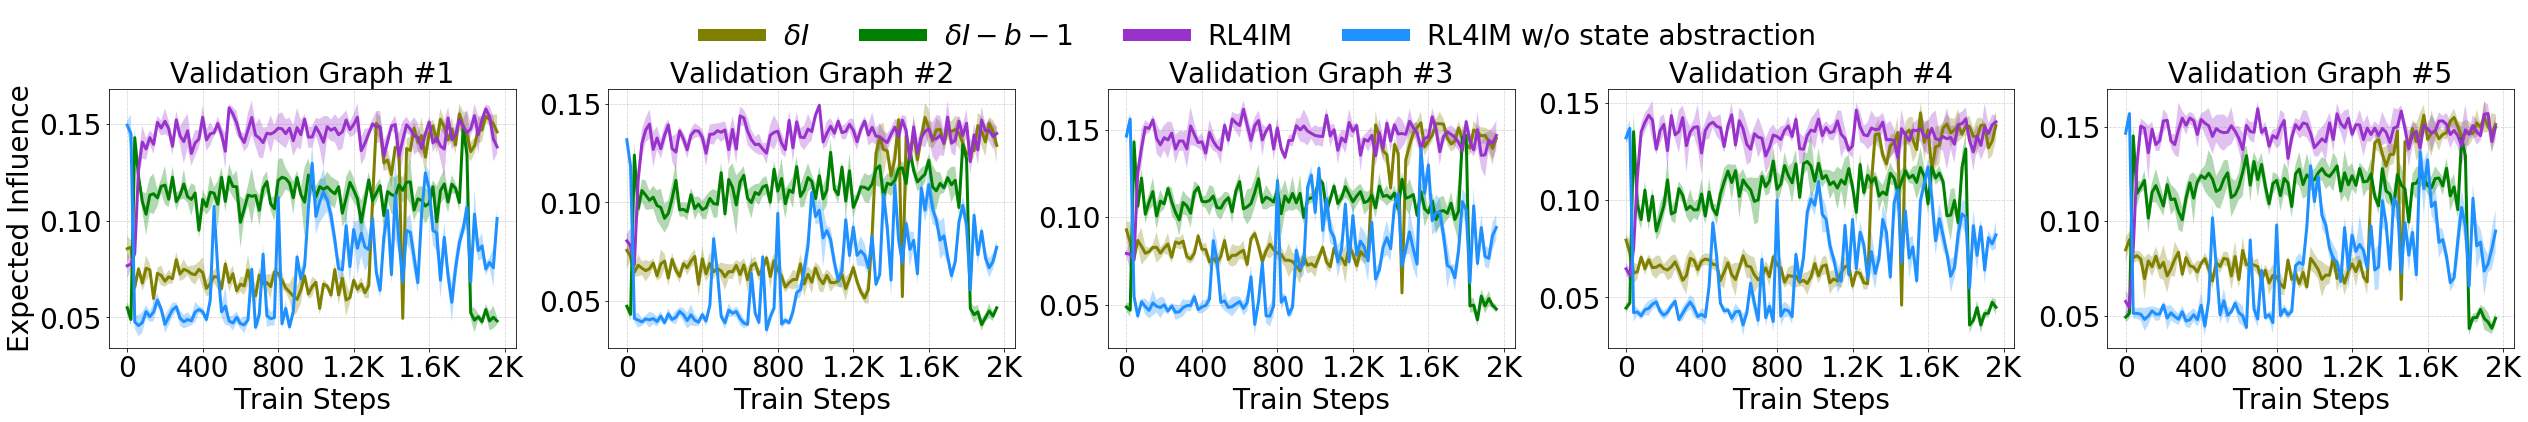

In [9]:
plot_figures(fig3_plot_data, fig_name='3')

In [ ]:
plot_figures(fig4_plot_data, fig_name='4')

In [ ]:
np.array(fig3_plot_data['100000']).shape

In [ ]:
np.array(fig4_plot_data['100000']).shape